<a href="https://colab.research.google.com/github/Anhai-bs/ee6405-final/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新段落

In [5]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8")) #check the files available in the directory

amazon.csv



In [6]:
#Now let's import and put the train and test datasets in  pandas dataframe

data = pd.read_csv('input/amazon.csv')

In [7]:
##display the first five rows of the train dataset.
data.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


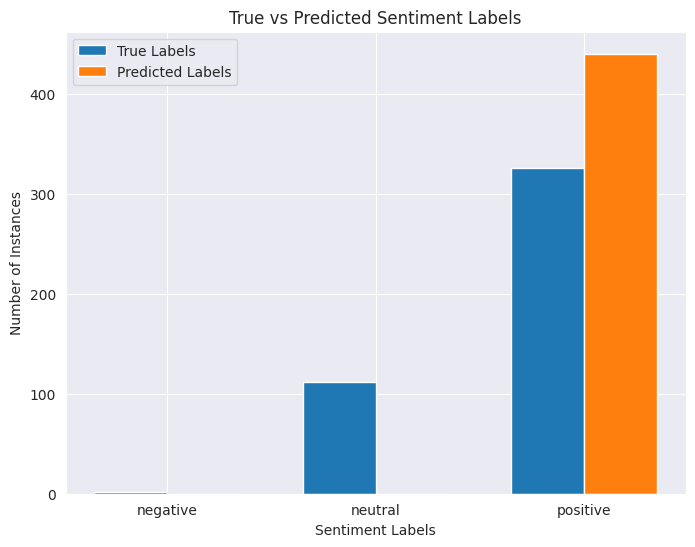

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import numpy as np
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 先处理rating，将其分为情感类别：正面（4及以上），负面（3以下），中立（3）
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x < 3 else 'neutral'))

# 选择review_content和sentiment作为特征和目标变量
X = data['review_content']
y = data['sentiment']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建一个管道，先进行TF-IDF向量化，然后应用朴素贝叶斯分类器
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 输出分类报告
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])
report
# 计算每个类别的数量
labels = ['negative', 'neutral', 'positive']
category_counts = [np.sum(y_test == label) for label in labels]
pred_counts = [np.sum(y_pred == label) for label in labels]

# 绘制直方图
x = np.arange(len(labels))  # 类别标签的索引
width = 0.35  # 条形宽度

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, category_counts, width, label='True Labels')
bar2 = ax.bar(x + width/2, pred_counts, width, label='Predicted Labels')

ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Number of Instances')
ax.set_title('True vs Predicted Sentiment Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

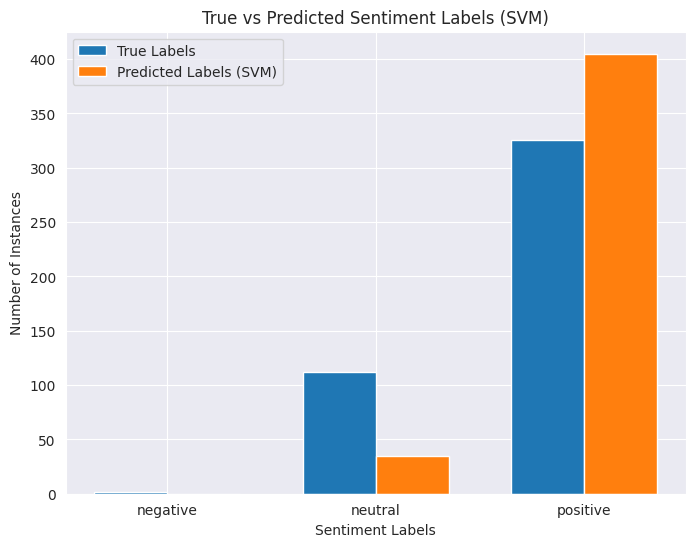

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 使用支持向量机（SVM）进行训练
svm_model = make_pipeline(TfidfVectorizer(stop_words='english'), SVC(kernel='linear', random_state=42))

# 训练模型
svm_model.fit(X_train, y_train)

# 预测测试集
y_pred_svm = svm_model.predict(X_test)

# 输出分类报告
svm_report = classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive'])
svm_report

# 计算每个类别的数量
svm_pred_counts = [np.sum(y_pred_svm == label) for label in labels]

# 绘制SVM模型的直方图
fig, ax = plt.subplots(figsize=(8, 6))
bar1_svm = ax.bar(x - width/2, category_counts, width, label='True Labels')
bar2_svm = ax.bar(x + width/2, svm_pred_counts, width, label='Predicted Labels (SVM)')

ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Number of Instances')
ax.set_title('True vs Predicted Sentiment Labels (SVM)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [25]:
!pip install keras
!pip install tensorflow

Epoch 1/20
17/17 - 11s - 628ms/step - accuracy: 0.7268 - loss: 0.8093 - val_accuracy: 0.7409 - val_loss: 0.6028
Epoch 2/20
17/17 - 7s - 386ms/step - accuracy: 0.7649 - loss: 0.5618 - val_accuracy: 0.7409 - val_loss: 0.6251
Epoch 3/20
17/17 - 10s - 607ms/step - accuracy: 0.7649 - loss: 0.5399 - val_accuracy: 0.7409 - val_loss: 0.6293
Epoch 4/20
17/17 - 9s - 539ms/step - accuracy: 0.7863 - loss: 0.4957 - val_accuracy: 0.7432 - val_loss: 0.6173
Epoch 5/20
17/17 - 7s - 396ms/step - accuracy: 0.8371 - loss: 0.4080 - val_accuracy: 0.7455 - val_loss: 0.6714
Epoch 6/20
17/17 - 10s - 597ms/step - accuracy: 0.8956 - loss: 0.2931 - val_accuracy: 0.7205 - val_loss: 0.6555
Epoch 7/20
17/17 - 6s - 324ms/step - accuracy: 0.9307 - loss: 0.2033 - val_accuracy: 0.7250 - val_loss: 0.7032
Epoch 8/20
17/17 - 10s - 601ms/step - accuracy: 0.9561 - loss: 0.1359 - val_accuracy: 0.7455 - val_loss: 0.8597
Epoch 9/20
17/17 - 10s - 609ms/step - accuracy: 0.9737 - loss: 0.1010 - val_accuracy: 0.7341 - val_loss: 0.9

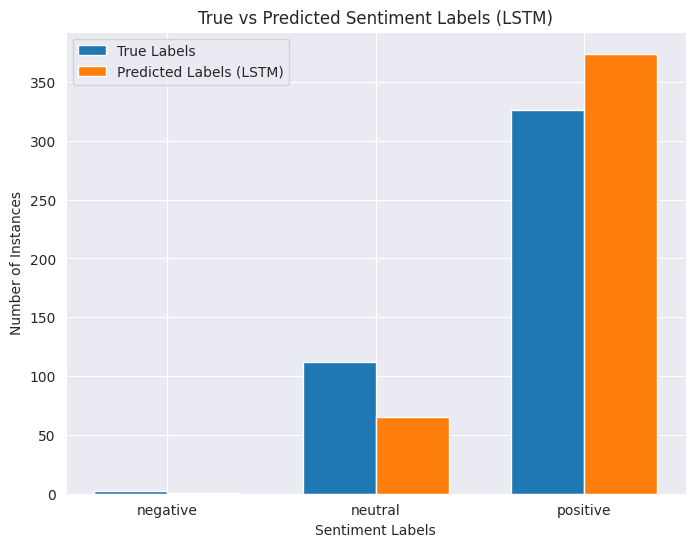

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import tensorflow as tf

# 设置随机种子，确保实验可重复
tf.random.set_seed(42)

# 限制使用的词汇数量
max_words = 5000
max_len = 100  # 每个评论的最大长度

# 使用Tokenizer进行文本处理
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# 将文本转化为序列
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 填充序列，确保每个评论的长度一致
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# 将情感标签转换为数字标签
y_train_num = y_train.map({'negative': 0, 'neutral': 1, 'positive': 2})
y_test_num = y_test.map({'negative': 0, 'neutral': 1, 'positive': 2})

# 创建LSTM模型
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3个类别：负面、中立、正面

# 编译模型
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_pad, y_train_num, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test_num), verbose=2)

# 进行预测
y_pred_lstm = model.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

# 输出分类报告
lstm_report = classification_report(y_test_num, y_pred_lstm, target_names=['negative', 'neutral', 'positive'])
lstm_report

# 计算每个类别的数量
lstm_pred_counts = [np.sum(y_pred_lstm == label) for label in range(3)]

# 绘制LSTM模型的直方图
fig, ax = plt.subplots(figsize=(8, 6))
bar1_lstm = ax.bar(x - width/2, category_counts, width, label='True Labels')
bar2_lstm = ax.bar(x + width/2, lstm_pred_counts, width, label='Predicted Labels (LSTM)')

ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Number of Instances')
ax.set_title('True vs Predicted Sentiment Labels (LSTM)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

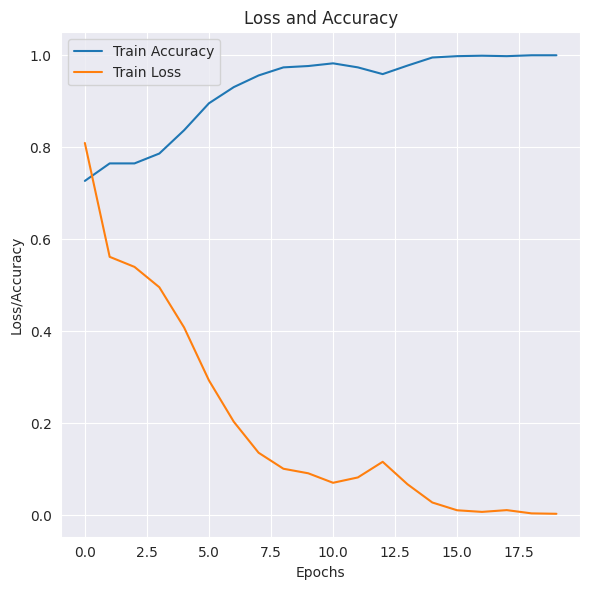

In [36]:
history_dict = history.history

# 绘制 accuracy 和 loss 的折线图
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

# 绘制训练和验证 accuracy
ax1.plot(history_dict['accuracy'], label='Train Accuracy')
ax1.plot(history_dict['loss'], label='Train Loss')
ax1.set_title('Loss and Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss/Accuracy')
ax1.legend()


plt.tight_layout()
plt.show()